In [9]:
import pandas as pd
import networkx as nx
from collections import deque

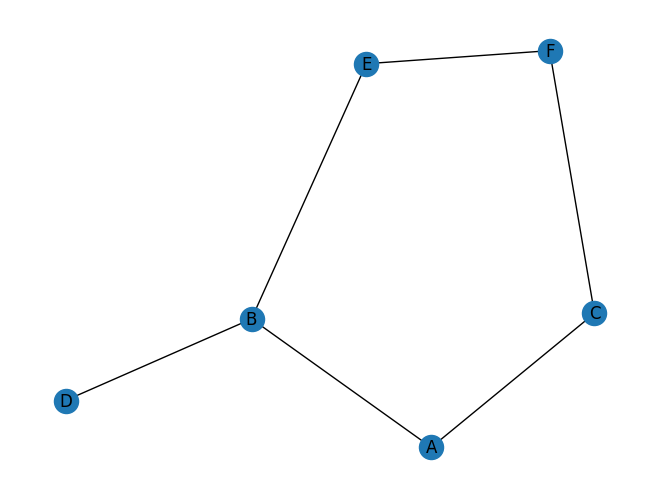

In [64]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
G = nx.Graph()
G.add_nodes_from(graph)
for g_item in graph:
    edges = list(map(lambda x: (g_item, x), graph[g_item]))
    G.add_edges_from(edges)

nx.draw(G, with_labels=True)

In [65]:
def graph_to_adjacency_list(graph: nx.Graph):
    adjacency_list = {}
    for node in graph.nodes:
        neighbors = list(graph.neighbors(node))
        adjacency_list[node] = neighbors
    return adjacency_list

def dfs_iterative(graph, start_vertex):
    visited = set()
    ret = []
    # Використовуємо стек для зберігання вершин
    stack = [start_vertex]  
    while stack:
        # Вилучаємо вершину зі стеку
        vertex = stack.pop()  
        if vertex not in visited:
            # print(vertex, end=' ')
            ret.append(vertex)
            # Відвідуємо вершину
            visited.add(vertex)
            # Додаємо сусідні вершини до стеку
            stack.extend(reversed(graph[vertex])) 
    return ret

def bfs_iterative(graph, start):
    # Ініціалізація порожньої множини для зберігання відвіданих вершин
    visited = set()
    # Ініціалізація черги з початковою вершиною
    queue = deque([start])
    ret = []

    while queue:  # Поки черга не порожня, продовжуємо обхід
        # Вилучаємо першу вершину з черги
        vertex = queue.popleft()
        # Перевіряємо, чи була вершина відвідана раніше
        if vertex not in visited:
            # Якщо не була відвідана, друкуємо її
            # print(vertex, end=" ")
            ret.append(vertex)
            # Додаємо вершину до множини відвіданих вершин
            visited.add(vertex)
            # Додаємо всіх невідвіданих сусідів вершини до кінця черги
            # Операція різниці множин вилучає вже відвідані вершини зі списку сусідів
            queue.extend(set(graph[vertex]) - visited)
    # Повертаємо множину відвіданих вершин після завершення обходу
    return ret  

In [67]:
adj = graph_to_adjacency_list(G)
dfs_iterative_res = dfs_iterative(adj, 'A')
print("DFS: ", dfs_iterative_res)

bfs_iterative_res = bfs_iterative(adj, 'A')
print("BFS: ", bfs_iterative_res)


DFS:  ['A', 'B', 'D', 'E', 'F', 'C']
BFS:  ['A', 'C', 'B', 'F', 'D', 'E']
